In [64]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv("./assets/ML/Marketing_Spending.csv")
df.head() 

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [66]:
print(df.describe(include="all"))

# pour voir si on a des NA
# 40tude
print(f"\n\nIs there any NULL value ? :")
df.isnull().any()

       Marketing Spending         Profit
count           50.000000      50.000000
mean         73721.615600  112012.639200
std          45902.256482   40306.180338
min              0.000000   14681.400000
25%          39936.370000   90138.902500
50%          73051.080000  107978.190000
75%         101602.800000  139765.977500
max         165349.200000  192261.830000


Is there any NULL value ? :


Marketing Spending    False
Profit                False
dtype: bool

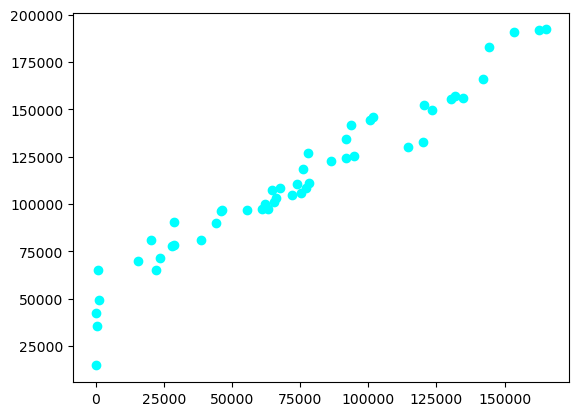

In [67]:
x=df.loc[:,"Marketing Spending"]
y=df.Profit

fig, ax = plt.subplots()
ax.scatter(x, y,c='cyan')


plt.show()

<Axes: xlabel='Marketing Spending', ylabel='Profit'>

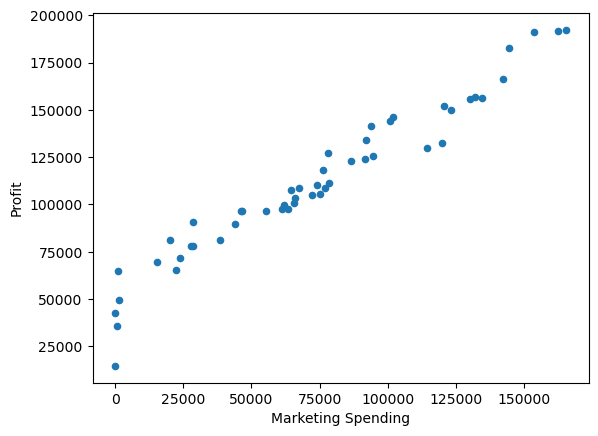

In [68]:
df.plot(x="Marketing Spending",y="Profit",kind='scatter' )

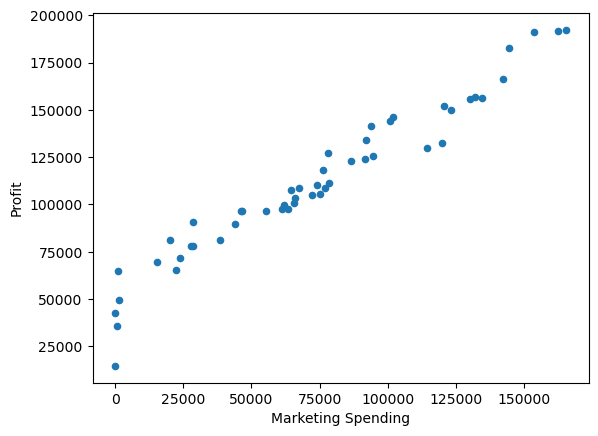

In [69]:
# 40tude
_ = df.plot.scatter(x="Marketing Spending",y="Profit")

In [70]:
#savoir si on a des valeurs null 
df.isnull().any()

print((df.isna().sum()/df.shape[0]).sort_values(ascending=False) * 100) # en pourcentage

Marketing Spending    0.0
Profit                0.0
dtype: float64


In [71]:
# Separate target variable Y from features X
print("Separating target variable from features...")


#### ATTENTION ON DOIT TRAVAILLER AVEC DES LIST 
## Choose the columns you want to have as your features
features_list=["Marketing Spending"]
X = df.loc[:,features_list] # We add feature_list into our loc 


y = df.loc[:,"Profit"] # variables à expliqué (cible)
print(y)
print(type(y))


# print("...Done.")
# print()

Separating target variable from features...
0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64
<class 'pandas.core.series.Series'>


In [72]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.") 

Splitting dataset into train set and test set...
...Done.


In [73]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  


print(X_train[:5])

numeric_features = [0]                   # Choose which column index we are going to scale
numeric_transformer = StandardScaler()   # standardisation des données (loi normal centré réduite)

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)



print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

    Marketing Spending
33            55493.95
35            46014.02
26            75328.87
34            46426.07
18            91749.16
...Done.
#### X_train AFTER preprocessing ####
[[-0.35006454]
 [-0.55530319]
 [ 0.07935762]
 [-0.54638238]
 [ 0.43485371]]



In [74]:

# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


Predictions on training set...
...Done.
[ 95676.21073667  87602.88620742 112568.08084243  87953.79738211
 126551.97418703]

[ 95676.21073667  87602.88620742 112568.08084243  87953.79738211
 126551.97418703]


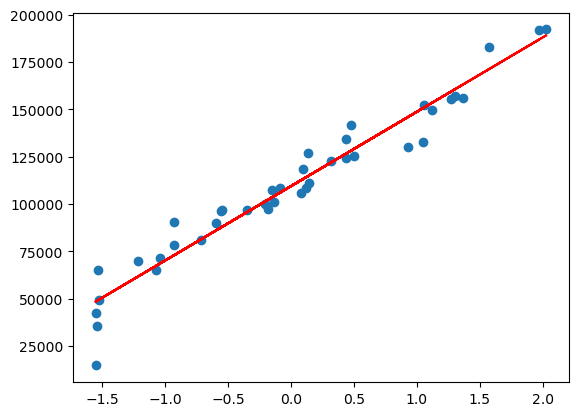

In [75]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

# 40tude
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(X_train, y_train_pred, c="red")

print(y_train_pred[:5])

--- Testing pipeline ---
Standardizing numerical features...
    Marketing Spending
28            66051.52
11           100671.96
10           101913.08
41            27892.92
2            153441.51

...Done.
[[-0.1214952 ]
 [ 0.6280306 ]
 [ 0.65490061]
 [-0.94762148]
 [ 1.77048111]]

Predictions on test set...
...Done.
[104667.27805998 134150.83410578 135207.80019517  72170.54428856
 179090.58602508]



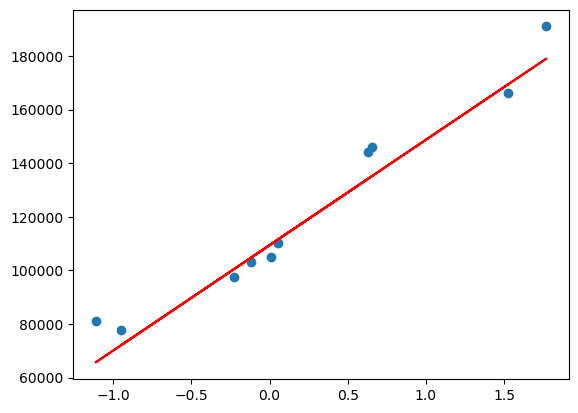

In [76]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test[:5])
print()

# 40tude
# Z! transform PAS fit transform !!!!!!!!!!!!!!!!!!!!
#X_test = feature_encoder.fit_transform(X_test)
X_test = feature_encoder.transform(X_test)


print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

fig, ax = plt.subplots()
ax.scatter(X_test, y_test)
_ = ax.plot(X_test, y_test_pred, c="red")


In [77]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[104667.27805998 134150.83410578 135207.80019517  72170.54428856
 179090.58602508]



In [78]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  0.9449589778363044
R2 score on test set :  0.9464587607787219


# 40tude
* R² test > R² training donc on est PAS en over fitting
* C'est une bonne nouvelle
* On peut utiliser le modèle avec d'autres entrées